In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict

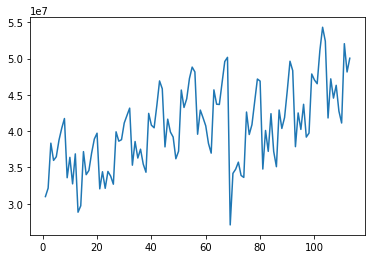

In [22]:
airmiles = pd.read_csv('../Datasets/airmiles.csv', index_col=0)
plt.plot(airmiles)
airmiles_tr = airmiles.iloc[:100]
airmiles_te = airmiles.iloc[100:]

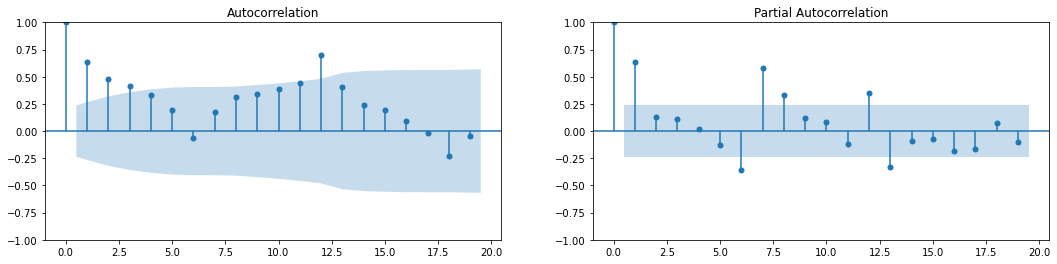

In [23]:
fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(np.log(airmiles_tr).iloc[:68], ax=ax[0])
plot_pacf(np.log(airmiles_tr).iloc[:68], method='ywm', ax=ax[1]);

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


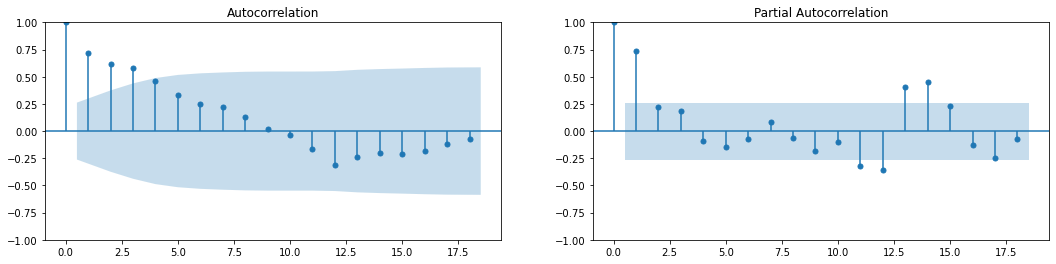

In [24]:
seasonal_dif_tr = np.log(airmiles_tr).iloc[:68].diff(12)
fig, ax = plt.subplots(1,2,figsize=(18,4))
plot_acf(seasonal_dif_tr.dropna(), ax=ax[0])
plot_pacf(seasonal_dif_tr.dropna(), ax=ax[1]);

In [25]:
exog = np.zeros(len(airmiles_tr))
exog[68] = 1

model = SARIMAX(endog = np.log(airmiles_tr.airmiles), exog = exog, order=(1,0,1), seasonal_order = (1,1,0,12))
model_fit = model.fit(disp=False,method='bfgs')
print(model_fit.summary())

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            airmiles   No. Observations:                  100
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                 147.865
Date:                             Thu, 02 Jun 2022   AIC                           -285.729
Time:                                     14:00:58   BIC                           -273.343
Sample:                                          0   HQIC                          -280.739
                                             - 100                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2588      0.016    -16.470      0.000      -0.290      -0.228
ar.L1          0.9227      

In [35]:
model_noint = SARIMAX(endog = np.log(airmiles_tr.airmiles), order=(1,0,1), seasonal_order = (1,1,0,12))
model_noint_fit = model_noint.fit(disp=False,method='bfgs')
print(model_noint_fit.summary())

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            airmiles   No. Observations:                  100
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                 121.204
Date:                             Thu, 02 Jun 2022   AIC                           -234.407
Time:                                     14:03:03   BIC                           -224.498
Sample:                                          0   HQIC                          -230.415
                                             - 100                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9106      0.111      8.209      0.000       0.693       1.128
ma.L1         -0.3903      

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
exog = np.zeros([len(airmiles_tr),3])
exog[68,0] = 1
exog[69,1] = 1
exog[70,2] = 1

model_arexog = SARIMAX(endog = np.log(airmiles_tr.airmiles), exog = exog, order=(1,0,1), seasonal_order = (1,1,0,12))
model_arexog_fit = model_arexog.fit(disp=False,method='bfgs')
print(model_arexog_fit.summary())

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                            airmiles   No. Observations:                  100
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                 159.720
Date:                             Thu, 02 Jun 2022   AIC                           -305.441
Time:                                     14:03:21   BIC                           -288.099
Sample:                                          0   HQIC                          -298.454
                                             - 100                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3204      0.017    -19.090      0.000      -0.353      -0.288
x2            -0.1596      

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


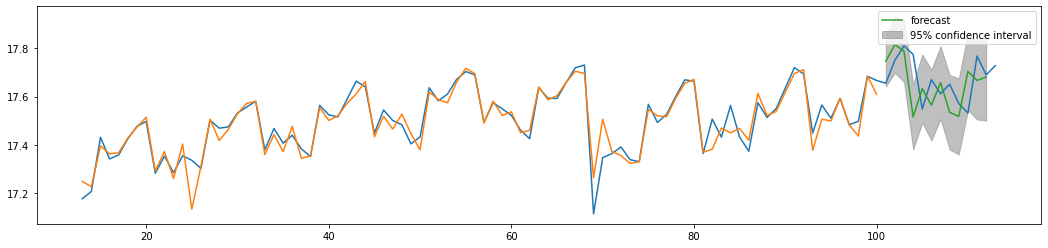

In [31]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(np.log(airmiles[12:]))
ax.plot(model_fit.fittedvalues[12:])
plot_predict(model_fit, start= 101, end = len(airmiles)-1, ax=ax, exog=np.zeros(len(airmiles_te)));

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


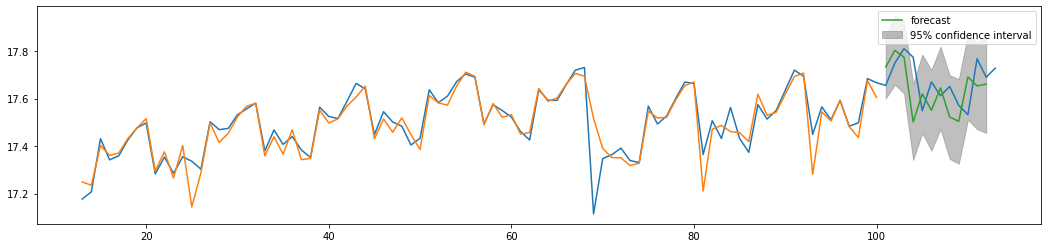

In [32]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(np.log(airmiles[12:]))
ax.plot(model_noint_fit.fittedvalues[12:])
plot_predict(model_noint_fit, start= 101, end = len(airmiles)-1, ax=ax);

/home/magui/miniconda3/envs/ceia-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


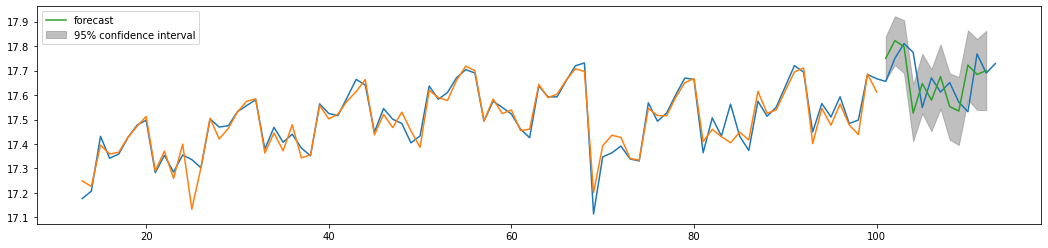

In [34]:
fig, ax = plt.subplots(1,1,figsize=(18,4))
ax.plot(np.log(airmiles[12:]))
ax.plot(model_arexog_fit.fittedvalues[12:])
plot_predict(model_arexog_fit, start= 101, end = len(airmiles)-1, ax=ax, exog=np.zeros([len(airmiles_te),3]));